In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation, BatchNormalization, LayerNormalization
from tensorflow.keras.models import Sequential


In [9]:
df = pd.read_csv("train.csv")

In [22]:
df.drop("date_time",axis=1,inplace=True)

In [23]:
df.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


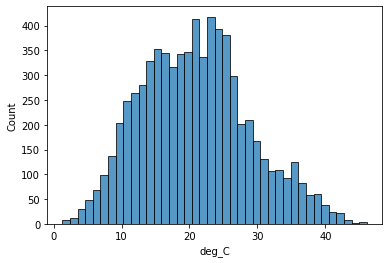

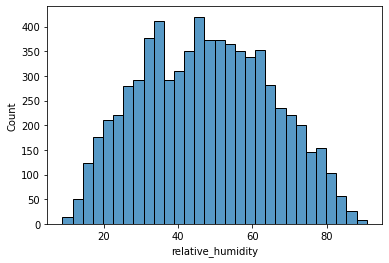

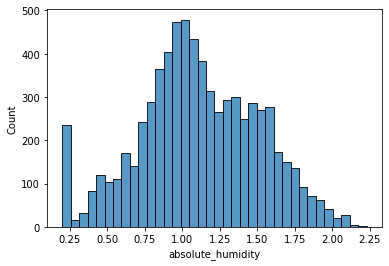

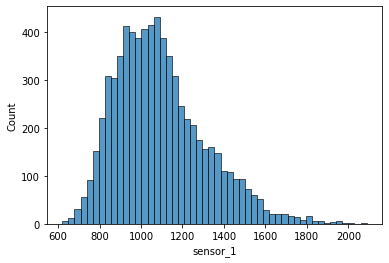

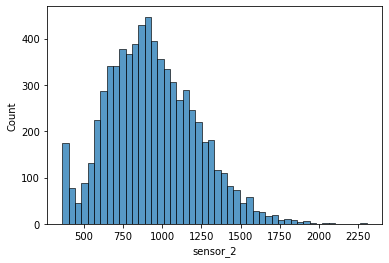

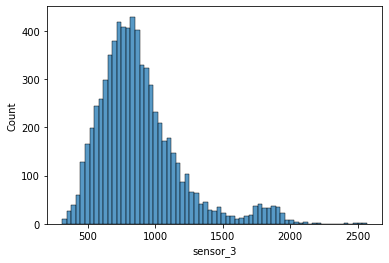

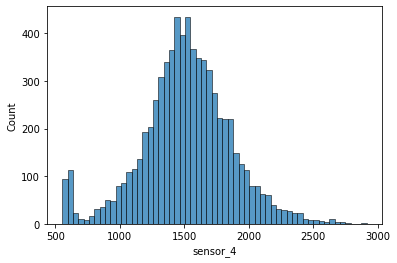

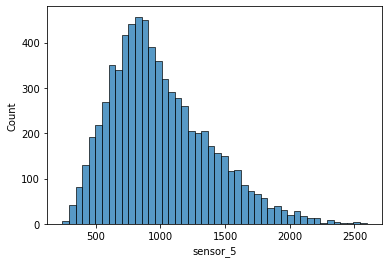

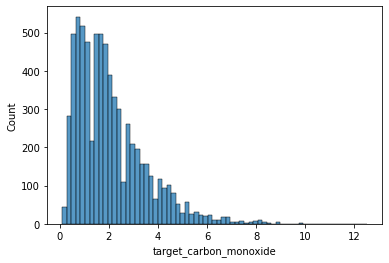

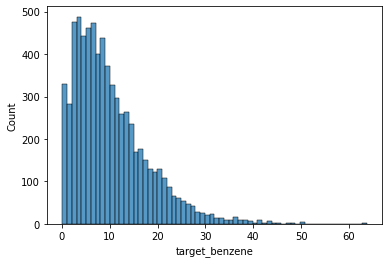

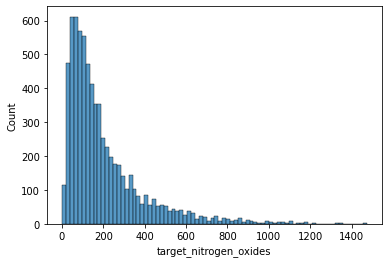

In [34]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

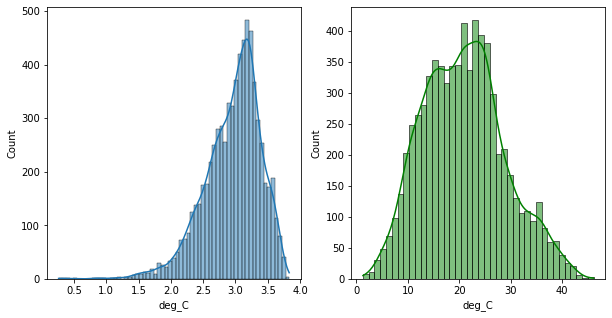

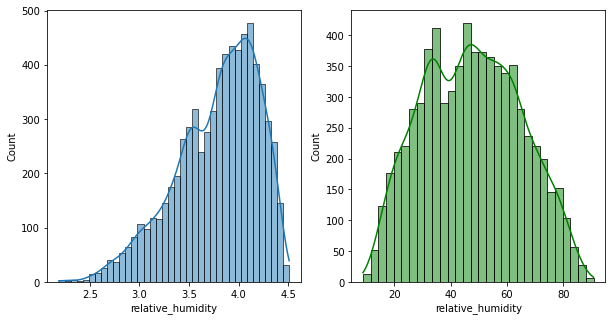

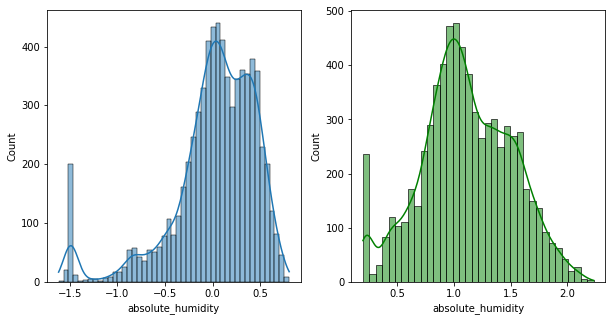

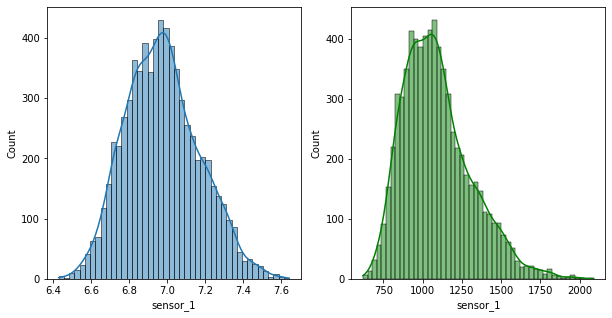

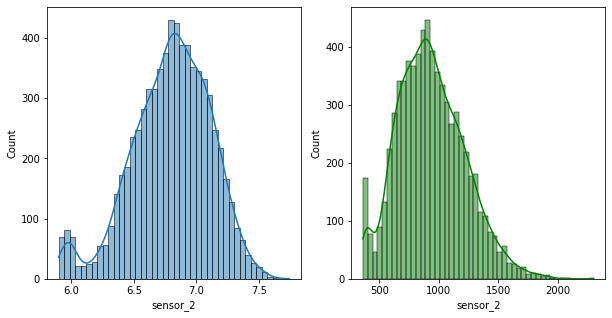

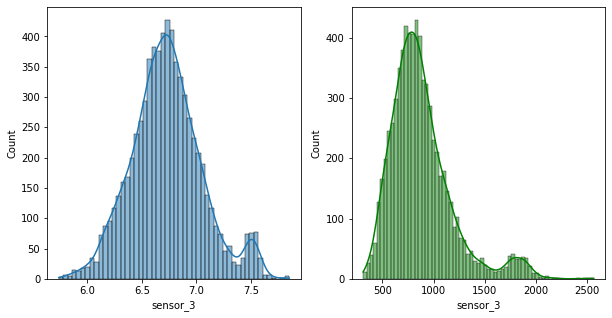

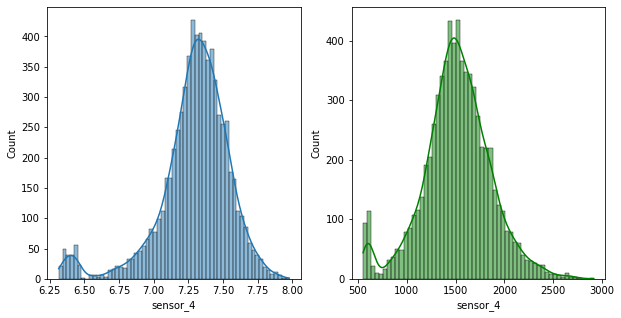

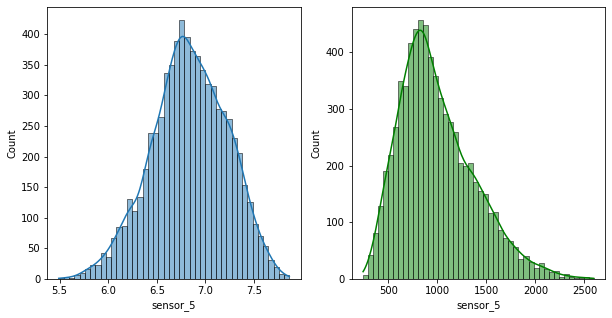

In [56]:
df1 = np.log(df[:-3])
for i in df1.columns[:-3]:
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    sns.histplot(x=i,data=df1,kde=True,ax=ax[0])  
    sns.histplot(x=i,data=df,color="green",kde=True,ax=ax[1])
    # plt.legend()
    plt.show()

In [78]:
model = Sequential()                # could make units 50, for better prediction
# model.add(LayerNormalization())     # Normalizing the input data 
# First LSTM layer
model.add(LSTM(units=50,return_sequences=True,input_shape=(8,1),activation="relu",unroll=True))
# model.add(Dropout(0.1))    # Removing some of the data from the previous layer to avoid overfitting
model.add(BatchNormalization())
model.add(LSTM(units=50, activation="relu",unroll=True,return_sequences=True))#, return_sequences=True))    # Second LSTM Layer
# model.add(Dropout(0.1))
model.add(Activation(activation="relu"))
model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
model.add(Activation(activation="relu"))
model.add(BatchNormalization())
model.add(LSTM(units=50))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
## 
# model.add(Dropout(0.1))
# model.add(LSTM(units=50,activation="relu"))
# model.add(Dense(units=500, activation="relu"))
# model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))  # Final LSTM Layer of unit=1, cause we have just one Output, that is, Closing Price
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1))   # Compiling, optimizer and loss can be changed to optimize the model for our specific purpose
model.fit(np.array(df.iloc[:,:-3]).reshape(7111,-1,1),np.array(df["target_carbon_monoxide"]).reshape(-1,1), epochs=50, batch_size=10)

2021-07-23 20:25:22.829861: I tensorflow/stream_executor/stream.cc:4986] [stream=0x17223470,impl=0x605e420] Internal: stream did not block host until done; was already in an error state


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:GPU:0 to /job:localhost/replica:0/task:0/device:CPU:0 in order to run Qr: stream did not block host until done; was already in an error state [Op:Qr]

In [75]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(model.predict(np.array(df.iloc[:,:-3]).reshape(7111,-1,1)),np.array(df["target_carbon_monoxide"]).reshape(-1,1),square=False)

(7111, 8, 1)

In [34]:
x = np.array(df1["excerpt"]).reshape(-1,1).shape